<a href="https://colab.research.google.com/github/Diya-Amith/TimeSeries-CaseStudy-Assignment/blob/main/TimeSeriesCaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy matplotlib seaborn statsmodels --quiet


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
jj_path = '/content/drive/My Drive/TimeSeries_Assignment/jj.csv'
amzn_path = '/content/drive/My Drive/TimeSeries_Assignment/AMZN.csv'

## **LOAD DATASETS**

In [4]:
#  Load datasets
def load_data(path, date_col):
    df = pd.read_csv(path)
    df.set_index(date_col, inplace=True)
    return df
jj_data = load_data(jj_path, 'date')
amzn_data = load_data(amzn_path, 'Date')

In [5]:
print("Johnsons and johnsons data",jj_data.head())
print("Amazon Data",amzn_data.head())

Johnsons and johnsons data             data
date            
1960-01-01  0.71
1960-04-01  0.63
1960-07-02  0.85
1960-10-01  0.44
1961-01-01  0.61
Amazon Data                  Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2018-02-20  72.324501  74.438499  72.324501  73.417503  73.417503  129984000
2018-02-21  74.250000  75.174500  73.945999  74.146004  74.146004  126088000
2018-02-22  74.767998  75.126999  73.788002  74.266998  74.266998   97162000
2018-02-23  74.766998  75.000000  74.324997  75.000000  75.000000   88362000
2018-02-26  75.459999  76.141998  75.349998  76.097504  76.097504   99100000


## **INITIAL PLOTS**

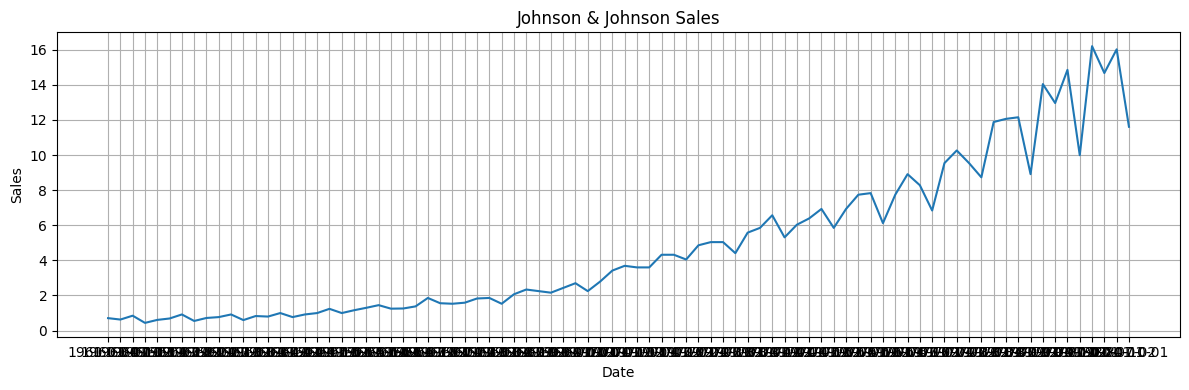

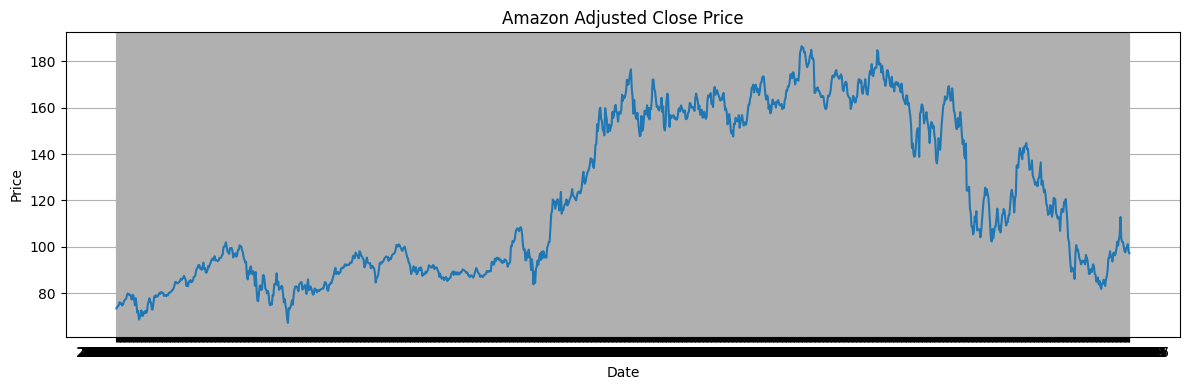

In [12]:
# Function to plot the time series
def plot_time_series(series, title, ylabel):
    plt.figure(figsize=(12, 4))
    plt.plot(series)
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot time series for both datasets
plot_time_series(jj_data['data'], "Johnson & Johnson Sales", "Sales")
plot_time_series(amzn_data['Adj Close'], "Amazon Adjusted Close Price", "Price")


## **STATIONARY /  NON-STATIONARITY TEST**

### **ACF & PACF Plots**

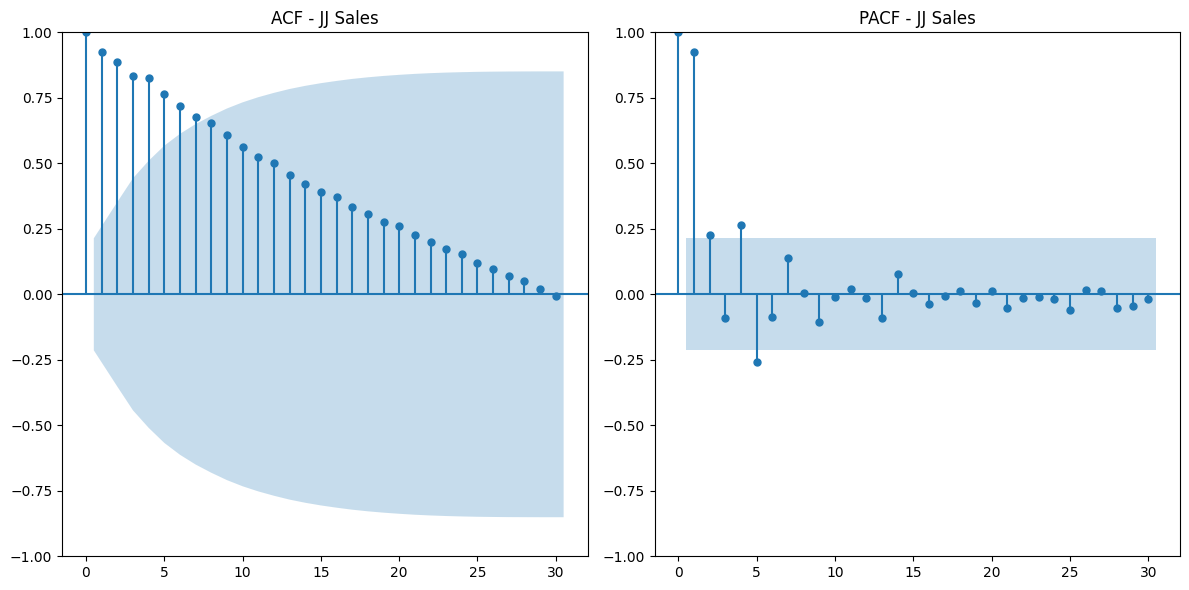

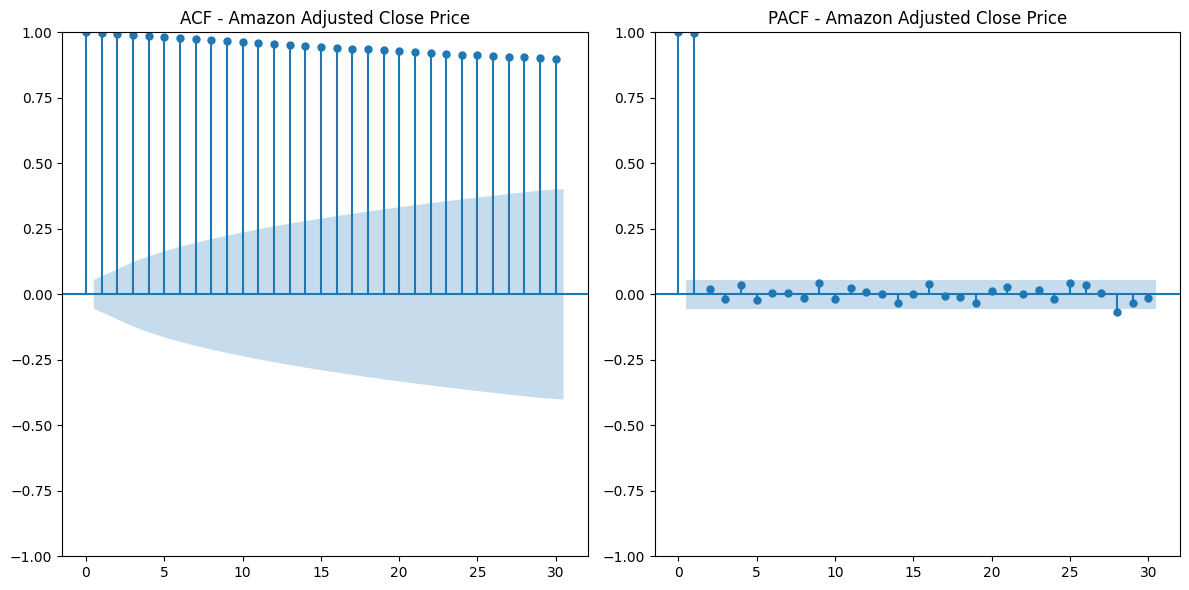

In [13]:
def plot_acf_pacf(series, lags=30, title=''):
    plt.figure(figsize=(12, 6))

    # ACF Plot
    plt.subplot(121)
    plot_acf(series, lags=lags, ax=plt.gca())
    plt.title(f'ACF - {title}')

    # PACF Plot
    plt.subplot(122)
    plot_pacf(series, lags=lags, ax=plt.gca())
    plt.title(f'PACF - {title}')

    plt.tight_layout()
    plt.show()

plot_acf_pacf(jj_data['data'], lags=30, title='JJ Sales')
plot_acf_pacf(amzn_data['Adj Close'], lags=30, title='Amazon Adjusted Close Price')

### **ADF Test**

In [15]:
def adf_test(series, title=''):
    print(f"\n--- ADF Test: {title} ---")
    result = adfuller(series.dropna())
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] < 0.05:
        print("Stationary")
    else:
        print("Non-Stationary")

adf_test(jj_data['data'], "JJ Sales")
adf_test(amzn_data['Adj Close'], "Amazon Adjusted Close Price")


--- ADF Test: JJ Sales ---
ADF Statistic: 2.7420165734574744
p-value: 1.0
Non-Stationary

--- ADF Test: Amazon Adjusted Close Price ---
ADF Statistic: -1.6578089913331728
p-value: 0.45297105465166737
Non-Stationary
